In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
import zipfile

with zipfile.ZipFile("archive.zip", "r") as zip_ref:
    zip_ref.extractall("malware-dataset")


In [3]:
MalwareDataset = pd.read_csv('malware-dataset/malware.csv', sep='|')
Legit = MalwareDataset[0:41323].drop(['legitimate'], axis=1)
Malware = MalwareDataset[41323::].drop(['legitimate'], axis=1)

In [4]:
print('The Number of important features is %i \n' % Legit.shape[1])

The Number of important features is 56 



In [5]:
MalwareDataset.columns


Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb',
       'Impor

In [6]:
MalwareDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138047 entries, 0 to 138046
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Name                         138047 non-null  object 
 1   md5                          138047 non-null  object 
 2   Machine                      138047 non-null  int64  
 3   SizeOfOptionalHeader         138047 non-null  int64  
 4   Characteristics              138047 non-null  int64  
 5   MajorLinkerVersion           138047 non-null  int64  
 6   MinorLinkerVersion           138047 non-null  int64  
 7   SizeOfCode                   138047 non-null  int64  
 8   SizeOfInitializedData        138047 non-null  int64  
 9   SizeOfUninitializedData      138047 non-null  int64  
 10  AddressOfEntryPoint          138047 non-null  int64  
 11  BaseOfCode                   138047 non-null  int64  
 12  BaseOfData                   138047 non-null  int64  
 13 

In [7]:
MalwareDataset.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1


In [8]:
MalwareDataset.tail()


,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0
138046,VirusShare_d7648eae45f09b3adb75127f43be6d11,d7648eae45f09b3adb75127f43be6d11,332,224,258,11,0,111616,468480,0,...,4,4.407252,1.980482,6.115374,96625.000000,20,318464,72,0,0


In [9]:
MalwareDataset.describe(include="all")

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047,138047,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
unique,107488,138047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,mshtml.dll,d7648eae45f09b3adb75127f43be6d11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,187,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,NaN,NaN,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,NaN,NaN,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,NaN,NaN,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,NaN,NaN,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,NaN,NaN,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000


In [10]:
MalwareDataset["legitimate"].value_counts()

legitimate
0    96724
1    41323
Name: count, dtype: int64

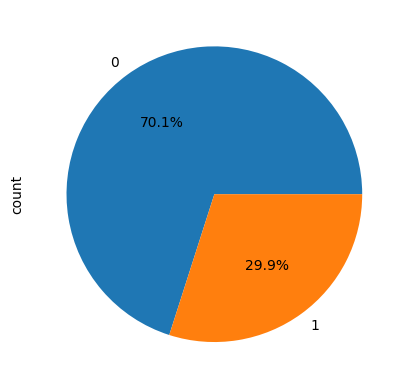

In [11]:
import matplotlib.pyplot as plt

MalwareDataset["legitimate"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.show()

In [12]:
import sklearn
Data = MalwareDataset.drop(['Name', 'md5', 'legitimate'], axis=1).values
Target = MalwareDataset['legitimate'].values

In [89]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(Data, Target, test_size=0.3,stratify=Target)
test_clf = sklearn.ensemble.RandomForestClassifier(n_estimators=50)
test_clf.fit(X_train, y_train)
test_clf_score = test_clf.score(X_test, y_test)

In [90]:
print(test_clf_score * 100)

99.43257273934564


In [91]:
test_tree = sklearn.tree.DecisionTreeClassifier(max_depth = 10)
test_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [92]:
test_tree_score = test_tree.score(X_test, y_test)
print(test_tree_score * 100)

99.12833514427139


In [93]:
test_svm = sklearn.svm.SVC()
test_svm.fit(X_train, y_train)

SVC()

In [94]:
test_svc_score = test_svm.score(X_test, y_test)
print(test_svc_score * 100)


70.066401062417


In [95]:

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

In [96]:
FeatSelect = sklearn.ensemble.ExtraTreesClassifier().fit(Data, Target)
Model = SelectFromModel(FeatSelect, prefit=True)
Data_new = Model.transform(Data)
print (Data.shape)
print (Data_new.shape)

(138047, 54)
(138047, 13)


In [97]:
import numpy as np
import sklearn.ensemble as ske

Features = Data_new.shape[1]
features = []
index=np.argsort(ske.ExtraTreesClassifier().fit(Data,Target).feature_importances_)[::-1][:Features]
for feat in range(Features):
        print(MalwareDataset.columns[2+index[feat]])
        features.append(MalwareDataset.columns[2+index[feat]])

DllCharacteristics
Characteristics
Machine
VersionInformationSize
SectionsMaxEntropy
Subsystem
MajorSubsystemVersion
ImageBase
SizeOfOptionalHeader
ResourcesMinEntropy
ResourcesMaxEntropy
MajorOperatingSystemVersion
SizeOfStackReserve


In [98]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(Data_new, Target, test_size=0.3,stratify=Target)
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

In [99]:
clf.score(X_train,y_train)

0.9998654689957778

In [100]:
print(score*100)


99.40842689846674


In [101]:
trees_clf = sklearn.tree.DecisionTreeClassifier(max_depth=10)
trees_clf.fit(X_train, y_train)
tree_score = trees_clf.score(X_test, y_test)

In [102]:
print(tree_score * 100)

99.09211638295304


In [103]:
from sklearn.svm import SVC

svm_clf = SVC(random_state = 42)
svm_clf.fit(X_train, y_train)


SVC(random_state=42)

In [104]:
svc_score = svm_clf.score(X_test, y_test)
print(svc_score*100)


70.07364481468066


In [105]:
cross_val_score(clf, X_train, y_train, cv=5,
                scoring='accuracy').mean()

np.float64(0.9932734551391249)

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

rf = sklearn.ensemble.RandomForestClassifier()

param_grid = {
    'n_estimators': [10, 50, 100, 150, 200]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best n_estimators:", grid_search.best_params_['n_estimators'])
print("Best cross-validation accuracy:", grid_search.best_score_)

# Evaluate on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))


Best n_estimators: 200
Best cross-validation accuracy: 0.9933562387374584
Test accuracy: 0.9942291440299409


In [107]:
from sklearn.model_selection import cross_val_score

In [108]:
test_clf_scores= cross_val_score(test_clf, X_test, y_test, cv=5,
               scoring='accuracy')

In [109]:
test_clf_scores

array([0.99118677, 0.99323916, 0.99166968, 0.9913075 , 0.99022093])

In [110]:
test_clf_scores.mean()

np.float64(0.991524809851503)

In [111]:
best_clf_scores = cross_val_score(best_rf,X_test, y_test, cv= 5,
               scoring='accuracy')

In [112]:
best_clf_scores

array([0.99191114, 0.99311844, 0.99191114, 0.99094531, 0.99022093])

In [113]:
best_clf_scores.mean()

np.float64(0.9916213932150187)

In [114]:
clf_scores=cross_val_score(clf,X_test, y_test, cv= 5,
               scoring='accuracy')

In [115]:
clf_scores

array([0.99154896, 0.99299771, 0.99203187, 0.99058312, 0.99046239])

In [116]:
clf_scores.mean()

np.float64(0.991524809851503)

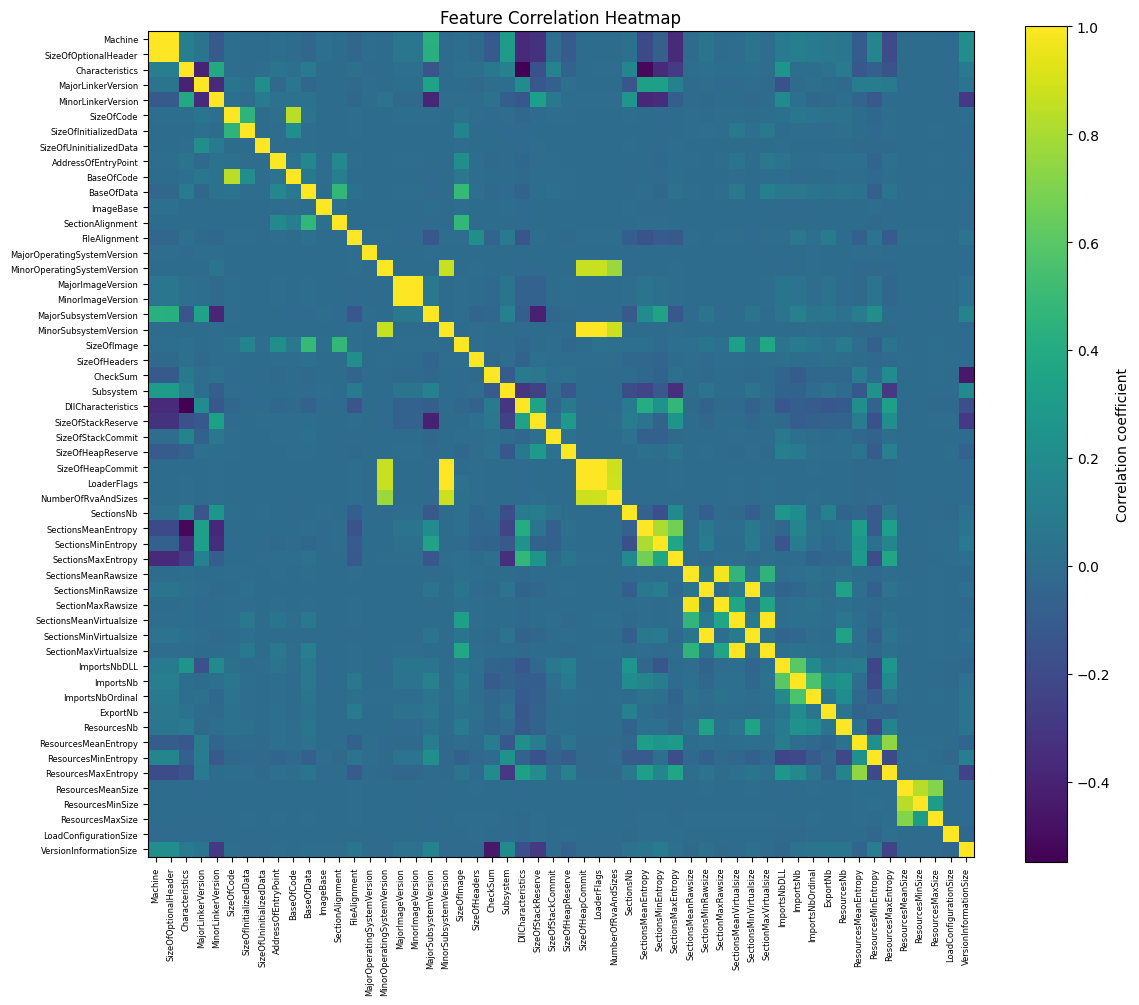

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Load your dataset
          # replace with your path
X = MalwareDataset.drop(['Name','md5','legitimate'],axis=1)          # keep only the 56 feature columns

# 2) Compute the correlation matrix
corr = X.corr()

# 3) Plot the heatmap
fig, ax = plt.subplots(figsize=(12, 10))    # adjust size as needed
im = ax.imshow(corr, interpolation='nearest')

# 4) Add a colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Correlation coefficient')

# 5) Set ticks and labels
n = len(corr.columns)
ax.set_xticks(np.arange(n))
ax.set_yticks(np.arange(n))
ax.set_xticklabels(corr.columns, rotation=90, fontsize=6)
ax.set_yticklabels(corr.columns, fontsize=6)

# 6) Annotate each cell if you like (optional—but beware clutter on 56×56 grid)
# thresh = corr.values.max() / 2
# for i in range(n):
#     for j in range(n):
#         ax.text(j, i, f"{corr.values[i, j]:.2f}",
#                 ha="center", va="center",
#                 color="white" if corr.values[i, j] > thresh else "black",
#                 fontsize=4)

ax.set_title('Feature Correlation Heatmap')
fig.tight_layout()
plt.show()


In [118]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [119]:
y_train_pred = cross_val_predict(clf, X_train, y_train, cv= 5)

In [120]:
y_pred = cross_val_predict(clf, X_test, y_test, cv=5)

In [121]:
cm = confusion_matrix(y_train, y_train_pred)

In [122]:
cm

array([[67363,   343],
       [  299, 28627]])

In [123]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred)


0.9881601656886434

In [124]:
recall_score(y_train, y_train_pred)

0.9896632787111941

In [125]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)

0.9889111510294321

In [126]:
print(features)

['DllCharacteristics', 'Characteristics', 'Machine', 'VersionInformationSize', 'SectionsMaxEntropy', 'Subsystem', 'MajorSubsystemVersion', 'ImageBase', 'SizeOfOptionalHeader', 'ResourcesMinEntropy', 'ResourcesMaxEntropy', 'MajorOperatingSystemVersion', 'SizeOfStackReserve']


In [127]:
import pickle
import joblib

In [128]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [129]:
joblib.dump(clf,'classifier.pkl')

['classifier.pkl']

In [130]:
open('features.pkl', 'wb').write(pickle.dumps(features))

277

In [131]:
# Load classifier
clf = joblib.load('classifier.pkl')
#load features
features = pickle.loads(open(os.path.join('features.pkl'),'rb').read())

In [132]:
%run main.py 

__     ______      __  __       _                        
\ \   / /  _ \    |  \/  | __ _| |_      ____ _ _ __ ___ 
 \ \ / /| |_) |   | |\/| |/ _` | \ \ /\ / / _` | '__/ _ \
  \ V /_|  _ < _  | |  | | (_| | |\ V  V / (_| | | |  __/
   \_/(_)_| \_(_) |_|  |_|\__,_|_| \_/\_/ \__,_|_|  \___|
                                                         
 ____       _            _             
|  _ \  ___| |_ ___  ___| |_ ___  _ __ 
| | | |/ _ \ __/ _ \/ __| __/ _ \| '__|
| |_| |  __/ ||  __/ (__| || (_) | |   
|____/ \___|\__\___|\___|\__\___/|_|   
                                       

 Welcome to antimalware detector 

 1. PE scanner
 2. Exit



Enter your choice :  2


Quitting Malware Detector


In [133]:
for feature in features:
    print(feature)

DllCharacteristics
Characteristics
Machine
VersionInformationSize
SectionsMaxEntropy
Subsystem
MajorSubsystemVersion
ImageBase
SizeOfOptionalHeader
ResourcesMinEntropy
ResourcesMaxEntropy
MajorOperatingSystemVersion
SizeOfStackReserve


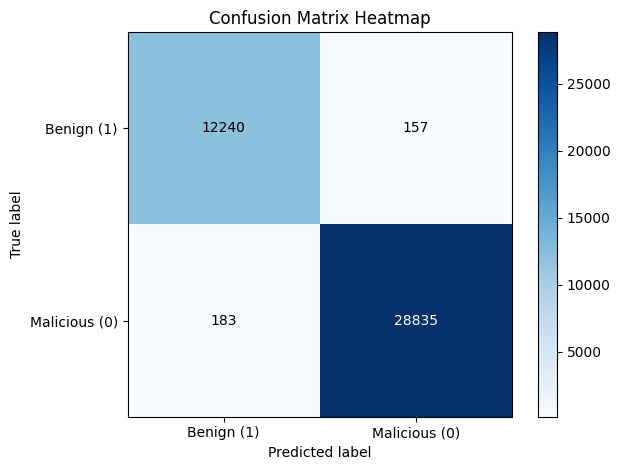

In [134]:
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])  # [1,0] if 1=benign, 0=malicious

# 2. Plot it
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
ax.figure.colorbar(im, ax=ax)

# 3. Labels, titles, ticks
classes = ['Benign (1)', 'Malicious (0)']
ax.set(xticks=np.arange(len(classes)),
       yticks=np.arange(len(classes)),
       xticklabels=classes,
       yticklabels=classes,
       xlabel='Predicted label',
       ylabel='True label',
       title='Confusion Matrix Heatmap')

# 4. Annotate the cells with counts
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

fig.tight_layout()
plt.show()


In [135]:
precision_score(y_test, y_pred)

0.9852692586331804

In [136]:
recall_score(y_test, y_pred)

0.9873356457207388

In [137]:
f1_score(y_test, y_pred)

0.9863013698630136

In [139]:
X_test.shape

(41415, 13)